# Math 354 Computer Assignment 2

In [1]:
from Math354 import *

In [2]:
StudentName = "Last, First"  # Replace this with your own name

# Section 4.2. Cutting Plane Method

## Worked Example: Exercise 4.2.3 using Cutting Plane Method

Maximize $x + y$ subject to
$$
2x + 3y \leq 12 \\
2x + y \leq 6 \\
x \geq 0, y \geq 0 \\
x,y \text{ integers.}
$$

In [3]:
A = Matrix([[2,3],
            [2,1]])
b = Matrix([[12],
            [6]])
c = Matrix([[1],
            [1]])
LP = StandardForm(A,b,c)

In [4]:
LP

Maximize $c^T x$ subject to $A_I x \leq b_I$, $A_J x = b_J$, $x_K \geq 0$, $x_L$ unrestricted, where

$$(A,b,c,I,J,K,L) = \left(\left[\begin{matrix}2 & 3\\2 & 1\end{matrix}\right], \left[\begin{matrix}12\\6\end{matrix}\right], \left[\begin{matrix}1\\1\end{matrix}\right], [0, 1], [], [0, 1], []\right)$$

In [5]:
CanonicalLP = ConvertToCanonicalForm(LP)

In [6]:
(x,w) = SimplexMethod(CanonicalLP)

Automatically detected initial basic feasible solution with basic variables [2, 3]


|| $x_0$| $x_1$| $x_2$| $x_3$ | |
| ---- | ----| ----| ----| ----| ---- |
| $x_2$ |$2$ | $3$ | $1$ | $0$ | $12$ |
| $x_3$ |$2$ | $1$ | $0$ | $1$ | $6$ |
|  | $-1$ | $-1$ | $0$ | $0$ | $0$|


Choosing entering variable to be $x_0$

Choosing departing variable to be $x_3$

|| $x_0$| $x_1$| $x_2$| $x_3$ | |
| ---- | ----| ----| ----| ----| ---- |
| $x_2$ |$0$ | $2$ | $1$ | $-1$ | $6$ |
| $x_0$ |$1$ | $1/2$ | $0$ | $1/2$ | $3$ |
|  | $0$ | $-1/2$ | $0$ | $1/2$ | $3$|


Choosing entering variable to be $x_1$

Choosing departing variable to be $x_2$

Final tableau:

|| $x_0$| $x_1$| $x_2$| $x_3$ | |
| ---- | ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $1/2$ | $-1/2$ | $3$ |
| $x_0$ |$1$ | $0$ | $-1/4$ | $3/4$ | $3/2$ |
|  | $0$ | $0$ | $1/4$ | $1/4$ | $9/2$|


Given the final tableau, we see the largest fractional part is $1/2$ (the fractional part of $3/2$ in the second row. The cutting plane method says we should create a new constraint (adding a slack variable $s$) by applying the floor function (round everything down) of the second row, which gives us:

$$ x_0 - x_2 + s = 1 $$

Since $x_0$ is a basic variable the new row in the tableau needs to have a $0$ in the $x_0$ column, so we need to pivot to rewrite this equation. This is acheived by subtracting the original second row from our new constraint:

$$ \begin{bmatrix} 1 & 0 & -1 & 0 & 1 & 1 \end{bmatrix} - \begin{bmatrix} 1 & 0 & -1/4 & 3/4 & 0 & 3/2 \end{bmatrix} = \begin{bmatrix} 0 & 0 & -3/4 & -3/4 & 1 & -1/2 \end{bmatrix} $$

We recall from the paper-and-pencil method that we can add this new row to the tableau, making a other entires in the new slack variable column zero for the slack variable. The new slack variable will be a new basic variable which is written on the left of the tableau. One can then proceed with the dual simplex method to restore feasibility.

We do this programmatically:

In [7]:
# First, we add a new nonnegative variable (the slack variable for the new constraint)
NewLP1 = AddNonnegativeVariable(CanonicalLP)
NewLP1

Maximize $c^T x$ subject to $A_I x \leq b_I$, $A_J x = b_J$, $x_K \geq 0$, $x_L$ unrestricted, where

$$(A,b,c,I,J,K,L) = \left(\left[\begin{matrix}2 & 3 & 1 & 0 & 0\\2 & 1 & 0 & 1 & 0\end{matrix}\right], \left[\begin{matrix}12\\6\end{matrix}\right], \left[\begin{matrix}1\\1\\0\\0\\0\end{matrix}\right], [], [0, 1], [0, 1, 2, 3, 4], []\right)$$

In [8]:
# Now we add the new constraint:
# We have to be careful. Python will evaluate 3/4 as being -1.
# To solve this, we have to explicitly tell it to deal with it as a symbolic fraction.
# We do this by typing "Rational(3)/Rational(4)
NewConstraintA = Matrix([[0,0,-Rational(3)/Rational(4), -Rational(3)/Rational(4), 1]])
NewConstraintb = Matrix([[-Rational(1)/Rational(2)]])
NewLP2 = AddEqualityConstraint(NewLP1, NewConstraintA, NewConstraintb)
NewLP2

Maximize $c^T x$ subject to $A_I x \leq b_I$, $A_J x = b_J$, $x_K \geq 0$, $x_L$ unrestricted, where

$$(A,b,c,I,J,K,L) = \left(\left[\begin{matrix}2 & 3 & 1 & 0 & 0\\2 & 1 & 0 & 1 & 0\\0 & 0 & - \frac{3}{4} & - \frac{3}{4} & 1\end{matrix}\right], \left[\begin{matrix}12\\6\\- \frac{1}{2}\end{matrix}\right], \left[\begin{matrix}1\\1\\0\\0\\0\end{matrix}\right], [], [0, 1, 2], [0, 1, 2, 3, 4], []\right)$$

Now we use dual simplex method starting from the initial choice of basic variables we get by appending the new slack variable $x_4$ (the variables are automatically named $x_0, x_1, x_2, x_3, x_4$) to the choice of basic  variables indicated in the final tableau above:

In [9]:
ChoiceOfBasicVariables = [1,0,4]

In [10]:
(x,w) = DualSimplexMethod(NewLP2, [1,0,4])

Using user-supplied initial basic dual feasible solution with basic variables [1, 0, 4]


|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$ | |
| ---- | ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $1/2$ | $-1/2$ | $0$ | $3$ |
| $x_0$ |$1$ | $0$ | $-1/4$ | $3/4$ | $0$ | $3/2$ |
| $x_4$ |$0$ | $0$ | $-3/4$ | $-3/4$ | $1$ | $-1/2$ |
|  | $0$ | $0$ | $1/4$ | $1/4$ | $0$ | $9/2$|


Choosing departing variable to be $x_4$

Choosing entering variable to be $x_2$

Final tableau:

|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$ | |
| ---- | ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $0$ | $-1$ | $2/3$ | $8/3$ |
| $x_0$ |$1$ | $0$ | $0$ | $1$ | $-1/3$ | $5/3$ |
| $x_2$ |$0$ | $0$ | $1$ | $1$ | $-4/3$ | $2/3$ |
|  | $0$ | $0$ | $0$ | $0$ | $1/3$ | $13/3$|


We see that this has found a feasible point (so we cannot conclude infeasible) but we have not found an integral solution. The things we need to take note of in the final tableau are

* the choice of basic variables (since this will be the start of the dual simplex method)
* the row with the largest fractional part on the right hand side

Given this we can repeat the cutting plane procedure again:

* Add a new slack variable
* Add a new constraint by taking the floor of the column corresponding to the row with the largest fractional part on the right hand side (i.e. introduce the new cutting plane constraint)

We'll do this step slightly differently (just to show we can). We can get away with adding a new constraint that is just the floor of the row with the largest fractional part on the right hand side. This is an equivalent constraint to the one where we also subtract out the original row. The subtracting out of the original row will automatically be done by the code when it makes a valid tableau and needs to do pivot operations to make sure basic variable columns only have a single $1$ in them.

All rows have a fractional part of $2/3$ so we just pick any of them. Let's pick the first row.

In [11]:
NewLP3 = AddEqualityConstraint(AddNonnegativeVariable(NewLP2), Matrix([[0,1,0,-1,0,1]]), Matrix([[2]]))
(x,w) = DualSimplexMethod(NewLP3, [1,0,2,5])

Using user-supplied initial basic dual feasible solution with basic variables [1, 0, 2, 5]


|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$| $x_5$ | |
| ---- | ----| ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $0$ | $-1$ | $2/3$ | $0$ | $8/3$ |
| $x_0$ |$1$ | $0$ | $0$ | $1$ | $-1/3$ | $0$ | $5/3$ |
| $x_2$ |$0$ | $0$ | $1$ | $1$ | $-4/3$ | $0$ | $2/3$ |
| $x_5$ |$0$ | $0$ | $0$ | $0$ | $-2/3$ | $1$ | $-2/3$ |
|  | $0$ | $0$ | $0$ | $0$ | $1/3$ | $0$ | $13/3$|


Choosing departing variable to be $x_5$

Choosing entering variable to be $x_4$

Final tableau:

|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$| $x_5$ | |
| ---- | ----| ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $0$ | $-1$ | $0$ | $1$ | $2$ |
| $x_0$ |$1$ | $0$ | $0$ | $1$ | $0$ | $-1/2$ | $2$ |
| $x_2$ |$0$ | $0$ | $1$ | $1$ | $0$ | $-2$ | $2$ |
| $x_4$ |$0$ | $0$ | $0$ | $0$ | $1$ | $-3/2$ | $1$ |
|  | $0$ | $0$ | $0$ | $0$ | $0$ | $1/2$ | $4$|


Inspecting this final tableau, we see we have non-negative entries on the RHS, so it has found a feasible point.
Moreover, we see that $x_0$ and $x_1$ are integral, so we have found an integral optimizer. Thus, we are done, we just need to report the answer. Since the original problem was just in two variables, lets write the answer as a 2-vector:

In [12]:
SolutionToExercise_4_2_4 = Matrix([[2],
                                   [2]])

# ==== ASSIGNMENT PROBLEM 1 ====

## Exercise 4.2.4 using Cutting Plane Method

Repeat the above manipulations for the following problem:

Maximize $x + 4y$ subject to
$$
x + 6y \leq 36 \\
3x + 8y \leq 60 \\
x \geq 0, y \geq 0 \\
x,y \text{ integers.}
$$

In [13]:
# ... do stuff here ...

In [14]:
## Fill in correct result based on above computation
Problem1Answer = Matrix([[0],
                         [0]])

# ==============================

# Automating The Cutting Plane Method

It may occur to you that it is silly to have to figure out intermediate steps by hand, and we could just write a function to automate this procedure. To do this, we need to be able to access the information we needed from the final tableau in a programmatic manner.

To this end we can use an argument option in the `SimplexMethod` and `DualSimplexMethod` method to make it return the final tableau instead of the `(solution, dual_solution)` pair. The tableau can then be queried so we can 

* Find the right-hand-side with largest fractional part
* Copy out the corresponding row
* Obtain the choice of basic variables

Given this, we can make an algorithm which repeatedly applies the cutting plane step until we either find the linear program has become infeasible or else we have found an integral solution.

For now, we will satisfy ourselves with making a routine which will work when the original linear program is in standard form $Ax \leq b$, $x \geq 0$ with $b \geq 0$. In `Math354.py` there is routine which can handle this case called `CuttingPlaneMethod`. Those interested should review it and verify it works according to the ideas above.


In [15]:
A = Matrix([[2,3],
            [2,1]])
b = Matrix([[12],
            [6]])
c = Matrix([[1],
            [1]])
LP = StandardForm(A,b,c)
CuttingPlaneMethod(LP)

Our goal is to find an integral solution to the following linear program:


Maximize $c^T x$ subject to $A_I x \leq b_I$, $A_J x = b_J$, $x_K \geq 0$, $x_L$ unrestricted, where

$$(A,b,c,I,J,K,L) = \left(\left[\begin{matrix}2 & 3\\2 & 1\end{matrix}\right], \left[\begin{matrix}12\\6\end{matrix}\right], \left[\begin{matrix}1\\1\end{matrix}\right], [0, 1], [], [0, 1], []\right)$$

Converting this linear program to canonical form gives us:


Maximize $c^T x$ subject to $A_I x \leq b_I$, $A_J x = b_J$, $x_K \geq 0$, $x_L$ unrestricted, where

$$(A,b,c,I,J,K,L) = \left(\left[\begin{matrix}2 & 3 & 1 & 0\\2 & 1 & 0 & 1\end{matrix}\right], \left[\begin{matrix}12\\6\end{matrix}\right], \left[\begin{matrix}1\\1\\0\\0\end{matrix}\right], [], [0, 1], [0, 1, 2, 3], []\right)$$

Now we find an optimizer using the simplex method.
Automatically detected initial basic feasible solution with basic variables [2, 3]


|| $x_0$| $x_1$| $x_2$| $x_3$ | |
| ---- | ----| ----| ----| ----| ---- |
| $x_2$ |$2$ | $3$ | $1$ | $0$ | $12$ |
| $x_3$ |$2$ | $1$ | $0$ | $1$ | $6$ |
|  | $-1$ | $-1$ | $0$ | $0$ | $0$|


Choosing entering variable to be $x_0$

Choosing departing variable to be $x_3$

|| $x_0$| $x_1$| $x_2$| $x_3$ | |
| ---- | ----| ----| ----| ----| ---- |
| $x_2$ |$0$ | $2$ | $1$ | $-1$ | $6$ |
| $x_0$ |$1$ | $1/2$ | $0$ | $1/2$ | $3$ |
|  | $0$ | $-1/2$ | $0$ | $1/2$ | $3$|


Choosing entering variable to be $x_1$

Choosing departing variable to be $x_2$

Final tableau:

|| $x_0$| $x_1$| $x_2$| $x_3$ | |
| ---- | ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $1/2$ | $-1/2$ | $3$ |
| $x_0$ |$1$ | $0$ | $-1/4$ | $3/4$ | $3/2$ |
|  | $0$ | $0$ | $1/4$ | $1/4$ | $9/2$|


The current solution is [3/2, 3, 0, 0]^T which is not integral.
Hence we introduce another cutting plane and use the dual simplex method to restore feasibility.
The fractional parts are [0, 1/2]
A right-hand-side entry with a maximal fractional part is 3/2 on row 1 (remember row numbering starts at 0 here)
We add the slack variable x_4 and the following cutting plane constraint:
[1, 0, -1, 0, 1]x = 1
Now we apply the dual simplex method to restore feasibility.
Using user-supplied initial basic dual feasible solution with basic variables [1, 0, 4]


|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$ | |
| ---- | ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $1/2$ | $-1/2$ | $0$ | $3$ |
| $x_0$ |$1$ | $0$ | $-1/4$ | $3/4$ | $0$ | $3/2$ |
| $x_4$ |$0$ | $0$ | $-3/4$ | $-3/4$ | $1$ | $-1/2$ |
|  | $0$ | $0$ | $1/4$ | $1/4$ | $0$ | $9/2$|


Choosing departing variable to be $x_4$

Choosing entering variable to be $x_2$

Final tableau:

|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$ | |
| ---- | ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $0$ | $-1$ | $2/3$ | $8/3$ |
| $x_0$ |$1$ | $0$ | $0$ | $1$ | $-1/3$ | $5/3$ |
| $x_2$ |$0$ | $0$ | $1$ | $1$ | $-4/3$ | $2/3$ |
|  | $0$ | $0$ | $0$ | $0$ | $1/3$ | $13/3$|


The current solution is [5/3, 8/3, 2/3, 0, 0]^T which is not integral.
Hence we introduce another cutting plane and use the dual simplex method to restore feasibility.
The fractional parts are [2/3, 2/3, 2/3]
A right-hand-side entry with a maximal fractional part is 8/3 on row 0 (remember row numbering starts at 0 here)
We add the slack variable x_5 and the following cutting plane constraint:
[0, 1, 0, -1, 0, 1]x = 2
Now we apply the dual simplex method to restore feasibility.
Using user-supplied initial basic dual feasible solution with basic variables [1, 0, 2, 5]


|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$| $x_5$ | |
| ---- | ----| ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $0$ | $-1$ | $2/3$ | $0$ | $8/3$ |
| $x_0$ |$1$ | $0$ | $0$ | $1$ | $-1/3$ | $0$ | $5/3$ |
| $x_2$ |$0$ | $0$ | $1$ | $1$ | $-4/3$ | $0$ | $2/3$ |
| $x_5$ |$0$ | $0$ | $0$ | $0$ | $-2/3$ | $1$ | $-2/3$ |
|  | $0$ | $0$ | $0$ | $0$ | $1/3$ | $0$ | $13/3$|


Choosing departing variable to be $x_5$

Choosing entering variable to be $x_4$

Final tableau:

|| $x_0$| $x_1$| $x_2$| $x_3$| $x_4$| $x_5$ | |
| ---- | ----| ----| ----| ----| ----| ----| ---- |
| $x_1$ |$0$ | $1$ | $0$ | $-1$ | $0$ | $1$ | $2$ |
| $x_0$ |$1$ | $0$ | $0$ | $1$ | $0$ | $-1/2$ | $2$ |
| $x_2$ |$0$ | $0$ | $1$ | $1$ | $0$ | $-2$ | $2$ |
| $x_4$ |$0$ | $0$ | $0$ | $0$ | $1$ | $-3/2$ | $1$ |
|  | $0$ | $0$ | $0$ | $0$ | $0$ | $1/2$ | $4$|


We have found an optimal integral solution to the original problem of x = [2, 2]^T


Matrix([
[2],
[2]])

# Section 4.3. Branch and Bound Method

## Worked Example: Exercise 4.2.3 using Branch and Bound Method

Maximize $x + y$ subject to
$$
2x + 3y \leq 12 \\
2x + y \leq 6 \\
x \geq 0, y \geq 0 \\
x,y \text{ integers.}
$$

We use `BranchAndBoundMethod` to take care of this. Here is an example:

In [16]:
A = Matrix([[2,3],
            [2,1]])
b = Matrix([[12],
            [6]])
c = Matrix([[1],
            [1]])
LP = StandardForm(A,b,c)
X = BranchAndBoundMethod(LP)

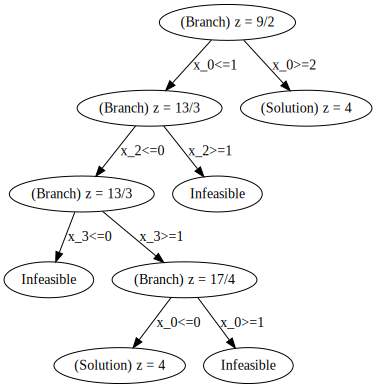

In [17]:
DrawGraph(X)

In [18]:
DisplayMatrix(X.solution())

<IPython.core.display.Math object>

# ==== ASSIGNMENT PROBLEM 2 ====

Consider the branch and bound diagram above.

By using the dual simplex method to restore feasibility after adding each of the constraints $x_0 \leq 1$, $x_2 \leq 0$, $x_3 \geq 1$, and $x_0 \leq 0$, produce the solution corresponding to the _Solution_ node which can be found in the left subtree from the top node.

In [19]:
# ... do work here ...

In [20]:
Problem2Answer = Matrix([[0],
                         [0]])

# ==============================

## Exercise 4.2.4 using Branch and Bound Method

Maximize $x + 4y$ subject to
$$
x + 6y \leq 36 \\
3x + 8y \leq 60 \\
x \geq 0, y \geq 0 \\
x,y \text{ integers.}
$$

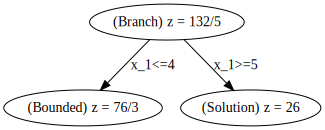

In [21]:
A = Matrix([[1,6],
            [3,8]])
b = Matrix([[36],
            [60]])
c = Matrix([[1],
            [4]])
LP = StandardForm(A,b,c)
BB = BranchAndBoundMethod(LP)
DrawGraph(BB)

In [22]:
DisplayMatrix(BB.solution())

<IPython.core.display.Math object>

# ==== ASSIGNMENT PROBLEM 3 ====


In the diagram above, why does the left child node say "Bounded"?
    
* (A) Because the integer solution corresponding to the left child is better than any possible solution that could be found in the right child.
* (B) Because the integer solution corresponding to the right child is better than any possible solution that could be found in the left child.
* (C) Because there are no integer solutions in the left child
* (D) Because there are no integer solutions in the right child


In [23]:
# Uncomment the correct answer:
# Problem3Answer = "A"
# Problem3Answer = "B"
# Problem3Answer = "C"
# Problem3Answer = "D"

# ==============================